In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

file = "sharks.csv"
bdf = pd.read_csv(file, encoding = "ISO-8859-1")

df = bdf[["Attack", "TurtleExactCombined", "MoonPhase", "Precipitation_Value", "WindSpeed", "Salinity", "Turbidity", "Temperature", "CrabLandings"]]

df = df.dropna(axis=0, how='any')

df["Attack"] = df["Attack"].astype('category')
df["AttackCat"] = df["Attack"].cat.codes
df["MoonPhase"] = df["MoonPhase"].astype('category')
df["MoonPhaseCat"] = df["MoonPhase"].cat.codes

df.head(15)

,Attack,TurtleExactCombined,MoonPhase,Precipitation_Value,WindSpeed,Salinity,Turbidity,Temperature,CrabLandings,AttackCat,MoonPhaseCat
0,No,0,First quarter,0.00,6.4,24.215556,23.422222,26.008889,1070,0,0
1,No,0,First quarter,0.19,4.4,21.960000,26.844444,24.673333,133,0,0
2,No,0,Waxing gibbous,0.00,7.5,20.451111,20.266667,24.951111,1061,0,7
3,No,0,Waxing gibbous,0.00,5.4,22.684444,15.488889,25.995556,341,0,7
4,No,1,Full,0.00,7.2,23.186667,44.733333,26.691111,1140,0,1
5,No,8,Waning gibbous,0.05,4.8,23.060000,9.533333,22.342222,56,0,5
6,No,6,Waning gibbous,0.00,4.3,23.135556,10.288889,26.064444,139,0,5
7,No,3,Third quarter,0.40,14.8,18.702222,34.777778,18.242222,1046,0,3
8,No,13,New,0.00,2.8,24.248889,8.777778,26.195556,440,0,2
9,No,31,Waxing crescent,0.34,6.6,24.277778,15.775000,27.008889,320,0,6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 11 columns):
Attack                 182 non-null category
TurtleExactCombined    182 non-null int64
MoonPhase              182 non-null category
Precipitation_Value    182 non-null float64
WindSpeed              182 non-null float64
Salinity               182 non-null float64
Turbidity              182 non-null float64
Temperature            182 non-null float64
CrabLandings           182 non-null int64
AttackCat              182 non-null int8
MoonPhaseCat           182 non-null int8
dtypes: category(2), float64(5), int64(2), int8(2)
memory usage: 12.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de96320>,
      dtype=object)

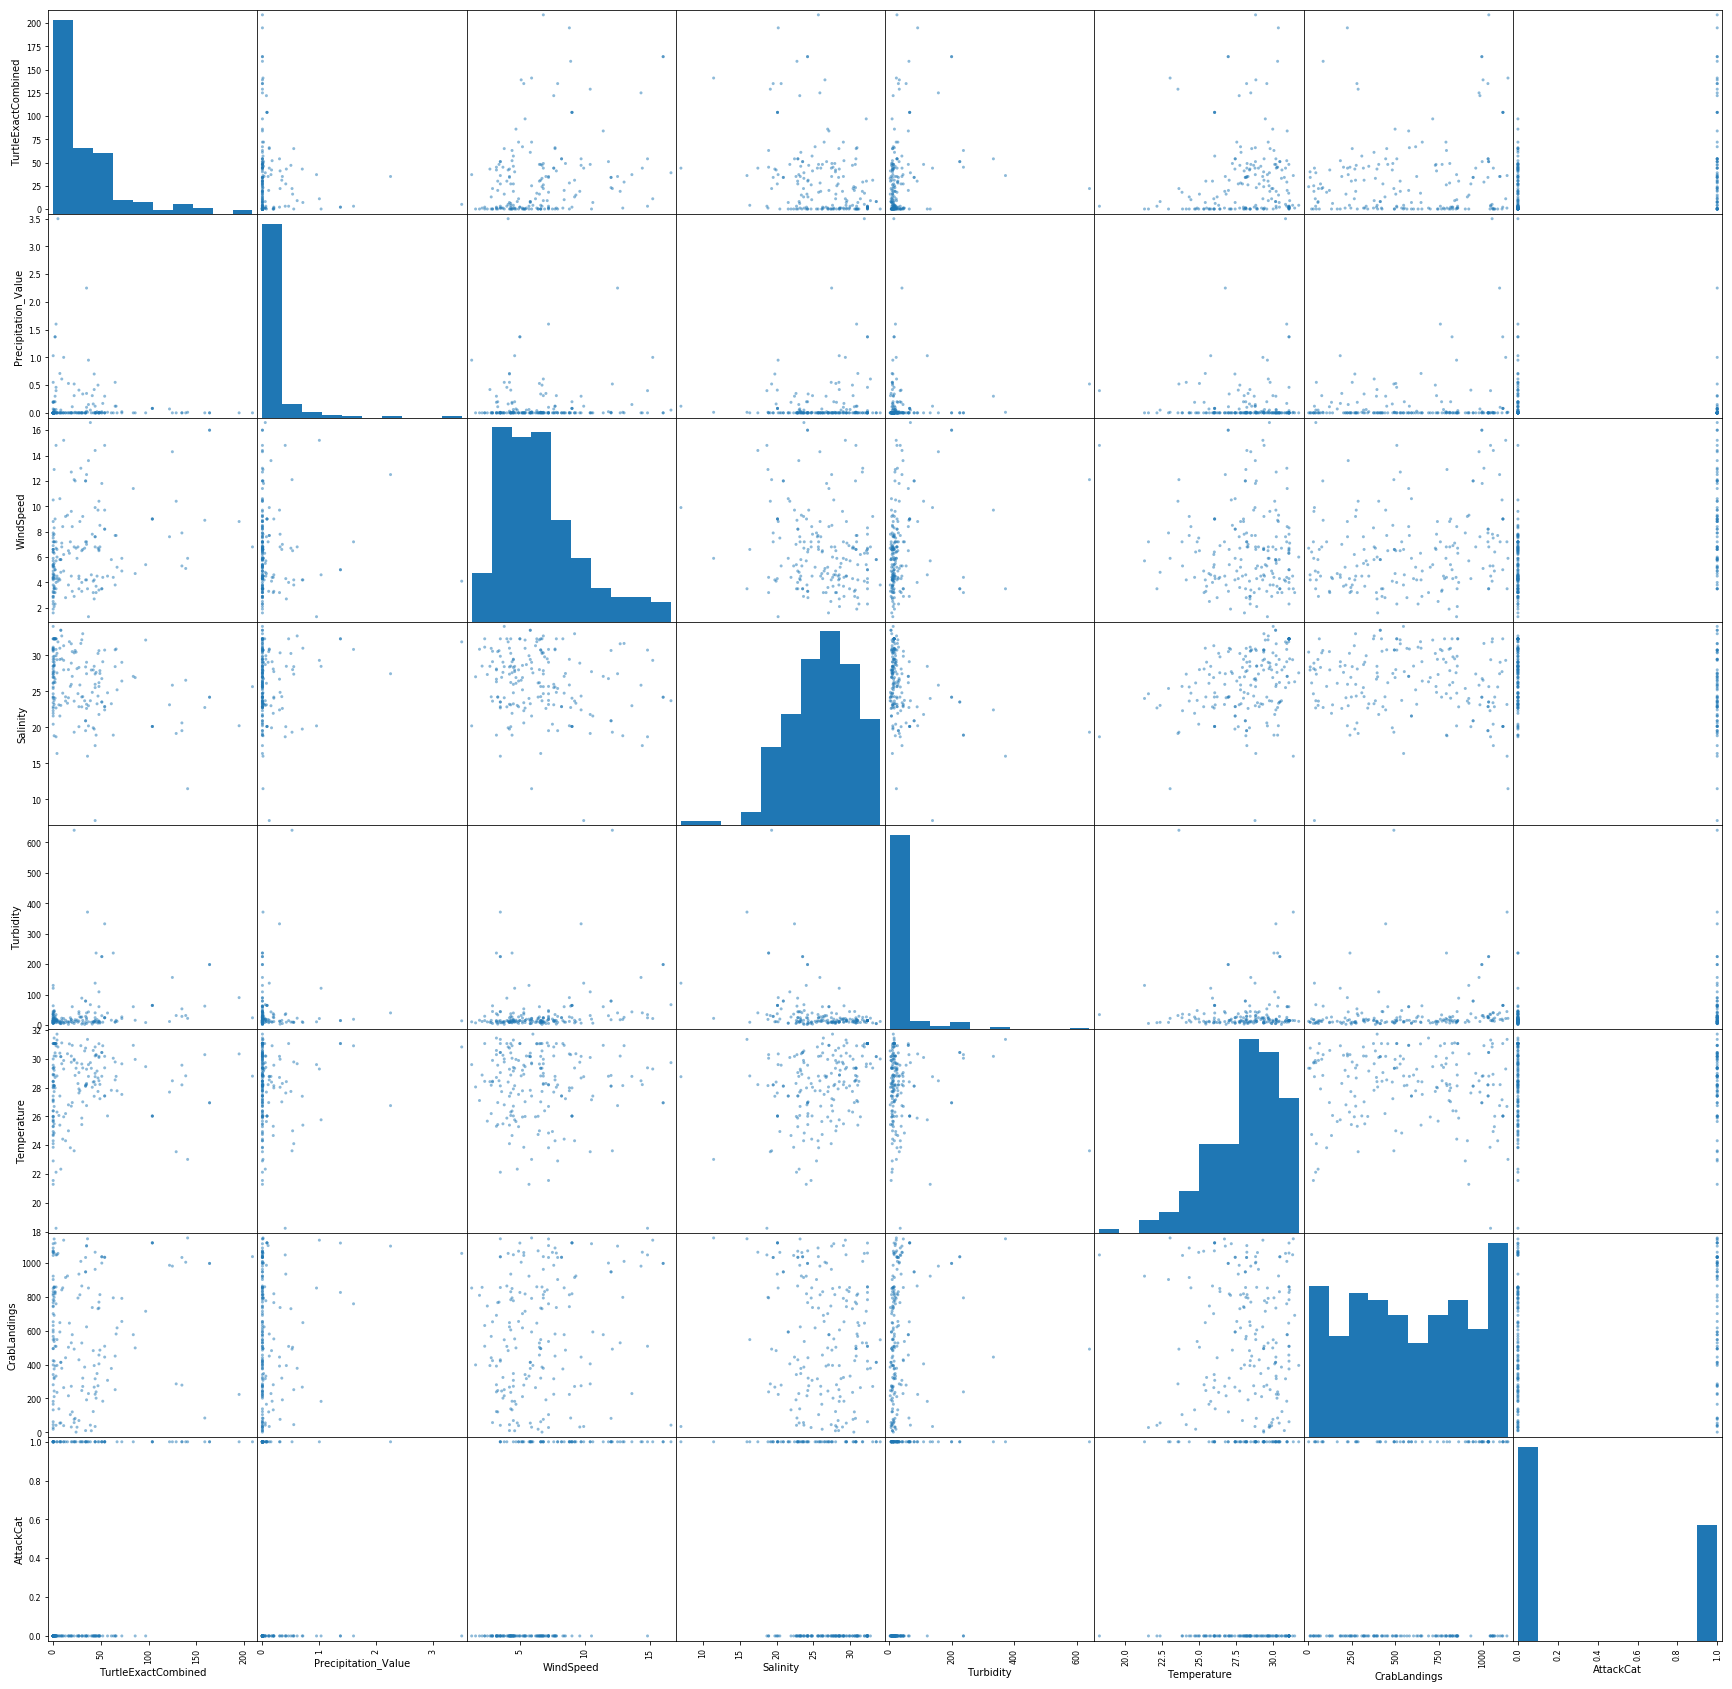

In [3]:
pd.plotting.scatter_matrix(df.loc[:,"TurtleExactCombined":"AttackCat"], figsize=(30,30))

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TurtleExactCombined,182.0,31.274725,40.755996,0.000000,1.000000,19.000000,44.750000,209.000000
Precipitation_Value,182.0,0.133187,0.392210,0.000000,0.000000,0.000000,0.057500,3.500000
WindSpeed,182.0,6.551648,3.169533,1.300000,4.300000,5.900000,7.875000,16.600000
Salinity,182.0,26.199711,4.462372,7.077778,23.229444,26.625556,29.510000,34.023077
Turbidity,182.0,38.295837,70.610488,2.666667,10.577778,15.865278,31.638889,640.000000
Temperature,182.0,28.167618,2.377764,18.242222,26.837778,28.471111,30.073889,31.708889
CrabLandings,182.0,584.417582,346.462456,2.000000,279.500000,571.000000,857.750000,1146.000000
AttackCat,182.0,0.373626,0.485101,0.000000,0.000000,0.000000,1.000000,1.000000
MoonPhaseCat,182.0,3.571429,2.372228,0.000000,2.000000,4.000000,6.000000,7.000000


# Accuracy of Picking Most Commonly Occurring Choice

In [5]:
df["AttackCat"].value_counts()

0    114
1     68
Name: AttackCat, dtype: int64

In [6]:
randomAcc = df["AttackCat"].value_counts().max() / df["AttackCat"].value_counts().sum()
randomAcc = round(randomAcc * 100, 2)
print("Accuracy: {randomAcc}%".format(randomAcc = randomAcc))

Accuracy: 62.64%


# Classifier Scores With Stratified Split

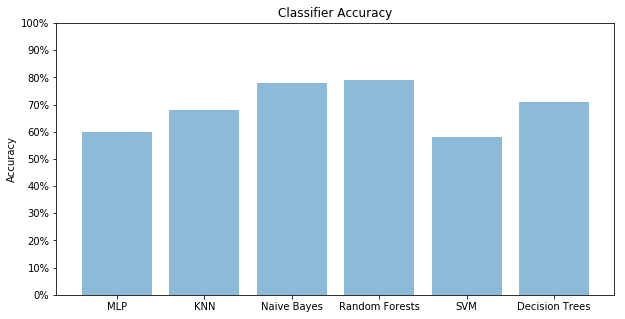

In [7]:
y = df["AttackCat"]
X = df.drop(["Attack", "AttackCat", "MoonPhase"], axis=1)

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()
rfc = RandomForestClassifier()
svm = LinearSVC(random_state=0, tol=1e-5)
dt = DecisionTreeClassifier(random_state=0)

clNames = ["MLP", "KNN", "Naive Bayes", "Random Forests", "SVM", "Decision Trees"]
classifiers = [mlp,knn,gnb,rfc,svm,dt]
classifierScores = []

for cl in classifiers:
    scores = cross_val_score(cl, X, y, cv=5)
    valSum = 0
    for score in scores:
        valSum += score
    average = valSum / 5
    classifierScores.append(round(average, 2))

x = np.arange(len(classifiers))
yLabels = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
yticks = ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]

plt.figure(figsize=(10, 5))
plt.bar(x, classifierScores, align='center', alpha=0.5)
plt.xticks(x, clNames)
plt.yticks(yLabels, yticks)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

# Scaling

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Multi-Layer Perceptron

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=1000)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [11]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[23  7]
 [ 4 12]]


In [12]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.77      0.81        30
          1       0.63      0.75      0.69        16

avg / total       0.78      0.76      0.76        46



In [13]:
mlpAcc = accuracy_score(y_test,predictions) * 100
mlpAcc = round(mlpAcc, 2)
print("Accuracy: {mlpAcc}%".format(mlpAcc=mlpAcc))

Accuracy: 76.09%


# K Nearest Neighbors

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
kPred = knn.predict(X_test)
print(confusion_matrix(y_test, kPred))

[[24  6]
 [ 8  8]]


In [16]:
print(classification_report(y_test,kPred))

             precision    recall  f1-score   support

          0       0.75      0.80      0.77        30
          1       0.57      0.50      0.53        16

avg / total       0.69      0.70      0.69        46



In [17]:
knnAcc = accuracy_score(y_test,kPred) * 100
knnAcc = round(knnAcc, 2)
print("Accuracy: {knnAcc}%".format(knnAcc=knnAcc))

Accuracy: 69.57%


# Naive Bayes

In [18]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [19]:
gnbPred = gnb.predict(X_test)
print(confusion_matrix(y_test, gnbPred))

[[28  2]
 [ 6 10]]


In [20]:
print(classification_report(y_test,gnbPred))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87        30
          1       0.83      0.62      0.71        16

avg / total       0.83      0.83      0.82        46



In [21]:
nbAcc = accuracy_score(y_test,gnbPred) * 100
nbAcc = round(nbAcc, 2)
print("Accuracy: {nbAcc}%".format(nbAcc=nbAcc))

Accuracy: 82.61%


# Random Forests

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
rfcPred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfcPred))

[[26  4]
 [ 5 11]]


In [24]:
print(classification_report(y_test,rfcPred))

             precision    recall  f1-score   support

          0       0.84      0.87      0.85        30
          1       0.73      0.69      0.71        16

avg / total       0.80      0.80      0.80        46



In [25]:
rfAcc = accuracy_score(y_test,rfcPred) * 100
rfAcc = round(rfAcc, 2)
print("Accuracy: {rfAcc}%".format(rfAcc=rfAcc))

Accuracy: 80.43%


# SVMs

In [26]:
svm = LinearSVC(random_state=0, tol=1e-5)
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [27]:
svmPred = svm.predict(X_test)
print(confusion_matrix(y_test, svmPred))

[[26  4]
 [ 6 10]]


In [28]:
print(classification_report(y_test,svmPred))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84        30
          1       0.71      0.62      0.67        16

avg / total       0.78      0.78      0.78        46



In [29]:
svmAcc = accuracy_score(y_test,svmPred) * 100
svmAcc = round(svmAcc, 2)
print("Accuracy: {svmAcc}%".format(svmAcc=svmAcc))

Accuracy: 78.26%


# Decision Trees

In [30]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
dtPred = dt.predict(X_test)

dtAcc = accuracy_score(y_test,dtPred) * 100
dtAcc = round(dtAcc, 2)
print("Accuracy: {dtAcc}%".format(dtAcc=dtAcc))

Accuracy: 80.43%


# Linear Regression

In [32]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lregPred = lreg.predict(X_test)

regError = mean_squared_error(y_test, lregPred)
regError = round(regError, 2)
regScore = r2_score(y_test, lregPred)
regScore = round(regScore, 2)
print("Mean squared error: {regError}".format(regError=regError))
print("R2 Score: {regScore}".format(regScore=regScore))

Mean squared error: 0.18
R2 Score: 0.22


# Summary

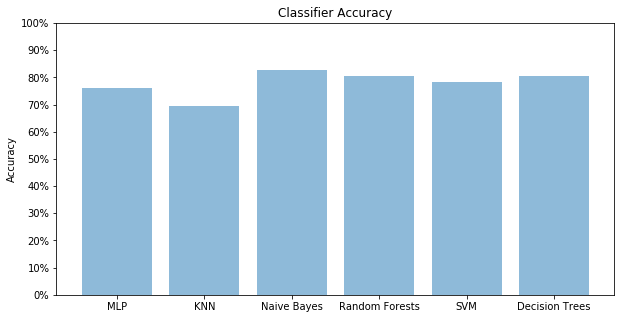

In [34]:
classifiers = ["MLP", "KNN", "Naive Bayes", "Random Forests", "SVM", "Decision Trees"]
accuracies = [mlpAcc, knnAcc, nbAcc, rfAcc, svmAcc, dtAcc]
x = np.arange(len(classifiers))
yticks = [0,10,20,30,40,50,60,70,80,90,100]
ytickLabels = ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]

plt.figure(figsize=(10, 5))
plt.bar(x, accuracies, align='center', alpha=0.5)
plt.xticks(x, classifiers)
plt.yticks(yticks, ytickLabels)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

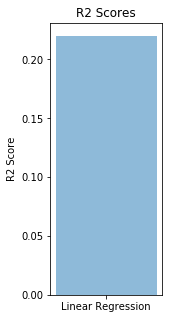

In [35]:
regressions = ["Linear Regression"]
r2scores = [regScore]
x = np.arange(len(regressions))

plt.figure(figsize=(2, 5))
plt.bar(x, r2scores, align='center', alpha=0.5)
plt.xticks(x, regressions)
plt.ylabel('R2 Score')
plt.title('R2 Scores')
plt.show()

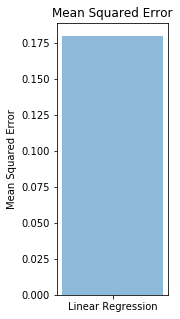

In [36]:
regErrors = [regError]

plt.figure(figsize=(2, 5))
plt.bar(x, regErrors, align='center', alpha=0.5)
plt.xticks(x, regressions)
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error')
plt.show()